# Create a stacked waterfall chart from the sea level budget

There are a few options to make waterfall charts:
- There is a [waterfall library](https://github.com/chrispaulca/waterfall) with a nice example [here](https://www.machinelearningplus.com/waterfall-plot-in-python/?utm_content=cmp-true)
- Plotly can also be used. See example [here](https://plotly.com/python/waterfall-charts/)

However, for those two options there does not seem to be a simple way to stack the water fall chart.

There are also two options making use of matplotlib directly:
- With the black lines in between bars [here](https://plotly.com/python/waterfall-charts/)
- With vertical skacking [here](https://csposts.com/python/creating-stacked-waterfall-chart-using-matplotlib-in-python/)

I will start with the matplotlib option.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
# For higher resolution images on retina display screens
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')


## Import data and reproduce the usual bar plot

In [3]:
budget_df = pd.read_csv('../outputs/slbudget_2022_11_23_ZSM_tide_gauge_1993_2021_ERA5_StericEN4_22_[500, 4000]m.csv')
budget_df.set_index('time', inplace=True)

In [6]:
def plot_trend_budget(slmean_df):
    
    fig, ax = plt.subplots(1, 1, figsize=(4.5,4))
    
    lin_trend = np.polyfit(slmean_df.index, 
                           slmean_df * 10, 1)[0,:]  # Convert from cm to mm
    
    if 'Steric' in slmean_df.columns:
        colors = ['red', 'blue', 'green', 'brown', 'magenta', 'grey', 'orange', 
                  'black', 'cyan', 'yellow']
            
    else:  
        colors = ['red', 'blue', 'purple', 'green', 'brown', 'magenta', 'grey', 
                  'orange', 'black', 'cyan', 'olive']

    ind = np.arange(len(slmean_df.columns) - 1 )

    legend_elements = []
    for i in ind:
        legend_elements.append(Line2D([0], [0], color = colors[i], lw = 4, 
                                      label = slmean_df.columns[i]))

    legend_elements.append(Line2D([0], [0], color = 'black', lw = 2, 
                                  label = 'tg obs'))
    
    ax.set_title(f'Linear trend budget: {slmean_df.index[0]}-{slmean_df.index[-1]}')
    ax.bar(ind, lin_trend[:-1], color=colors)
    ax.hlines(y=lin_trend[-1], xmin=-0.5, xmax=0.5, color='black')
    ax.set_ylabel('Linear trend (mm/year)')
    ax.legend(handles=legend_elements, loc='upper right', prop={'size': 9})
    ax.set_ylim(-0.6, 3.6)
    ax.text(0.02, 0.01, 
                 f'Observed trend: {round(lin_trend[-1],2)}\n'+ 
                 f'Budget trend: {round(lin_trend[0],2)}', 
                 va='bottom', ha='left', 
                 transform=ax.transAxes)
    
    return fig, ax

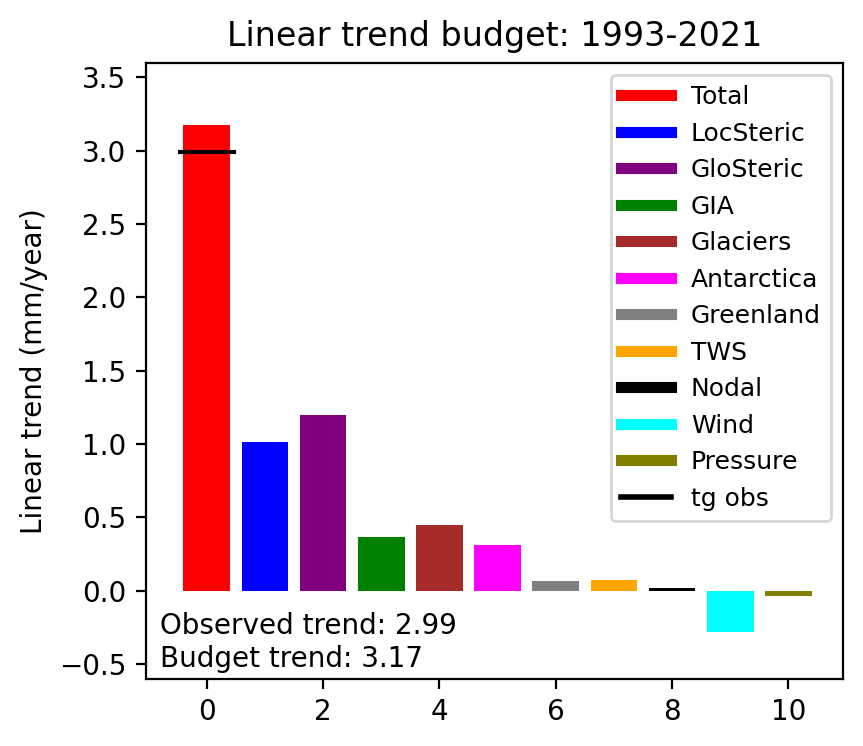

In [7]:
fig, ax = plot_trend_budget(budget_df)

## Waterfall chart

### Using Pandas

### Simple test

In [81]:
wf_fig_df = pd.DataFrame({'part1': [-1,1,4], 'part2': [0,2,0], 'part3': [0,2,0]}, index=[0,1,3] )

bot = [0, wf_fig_df.iloc[0].sum(),0]

In [82]:
wf_fig_df.iloc[0].sum()

-1

<AxesSubplot: >

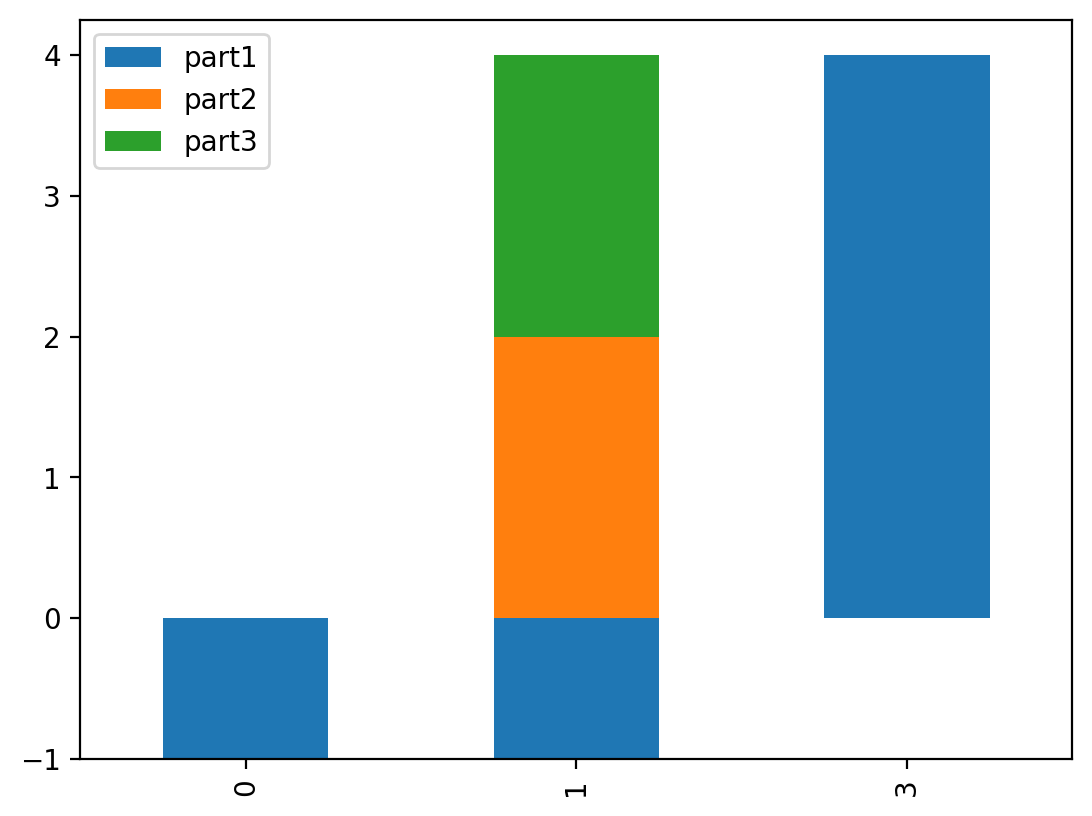

In [83]:
wf_fig_df.plot(kind='bar', bottom=bot, stacked=True)

### Play with example

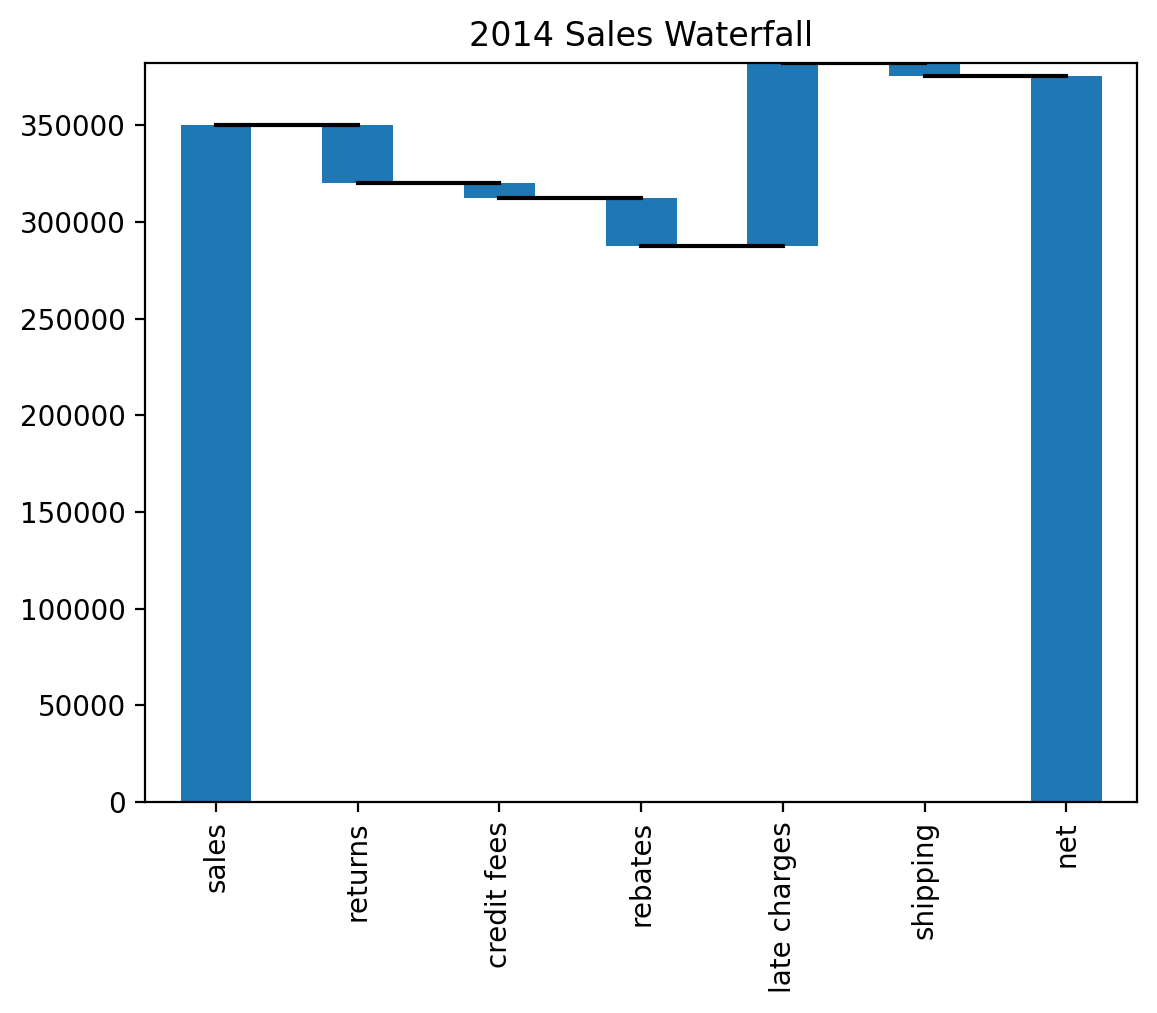

In [41]:
index = ['sales','returns','credit fees','rebates','late charges','shipping']
data = {'amount': [350000,-30000,-7500,-25000,95000,-7000]}
trans = pd.DataFrame(data=data,index=index)

blank=trans.amount.cumsum().shift(1).fillna(0)

total = trans.sum().amount
trans.loc["net"] = total
blank.loc["net"] = total

step = blank.reset_index(drop=True).repeat(3).shift(-1)
step.iloc[1::3] = np.nan

blank.loc["net"] = 0

my_plot = trans.plot(kind='bar', stacked=True, bottom=blank, legend=None, title="2014 Sales Waterfall")
my_plot.plot(step.index, step.values,'k');

In [35]:
trans

,amount
sales,350000
returns,-30000
credit fees,-7500
rebates,-25000
late charges,95000
shipping,-7000
net,375500


Not very clear how to combine this with stacking

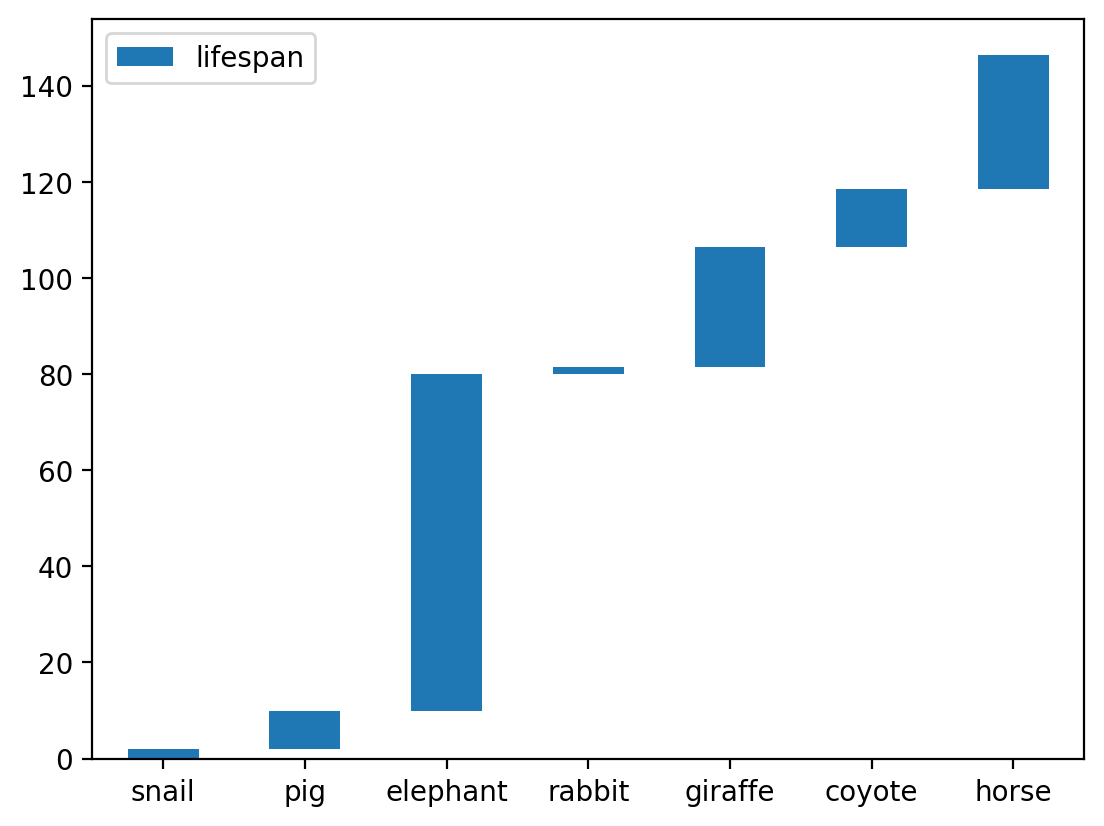

In [38]:
#speed = [0.1, 17.5, 40, 48, 52, 69, 88]

lifespan = [2, 8, 70, 1.5, 25, 12, 28]

index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']

df = pd.DataFrame({'lifespan': lifespan}, index=index)

blank=df.lifespan.cumsum().shift(1).fillna(0)

ax = df.plot(kind='bar', rot=0, stacked=True, bottom=blank)

In [36]:
df

,lifespan
snail,2.0
pig,8.0
elephant,70.0
rabbit,1.5
giraffe,25.0
coyote,12.0
horse,28.0
